In [1]:
# のインポート
import pandas as pd
import numpy as np
import shap
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# データセットの読込み
boston = load_boston()

# データフレームの作成
# 説明変数の格納
df = pd.DataFrame(boston.data, columns = boston.feature_names)

# 目的変数の追加
df['MEDV'] = boston.target

# データの中身を確認
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
# 学習データと評価データを作成
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:13], df.iloc[:, 13],
                                                    test_size=0.2, random_state=1)

# モデルの学習
RF = RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [3]:
explainer = shap.TreeExplainer(RF)

In [4]:
shap_values = explainer.shap_values(X=x_train)

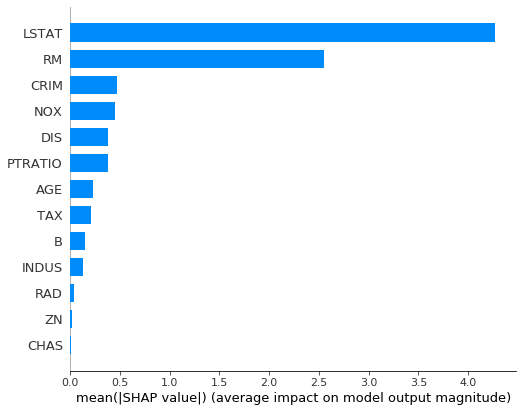

In [5]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

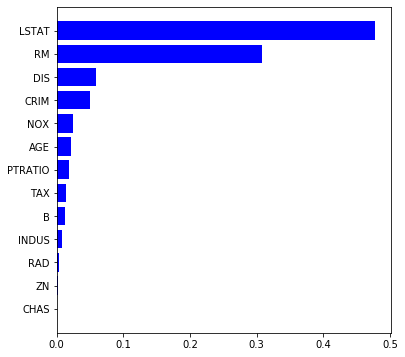

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

features = df.columns
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

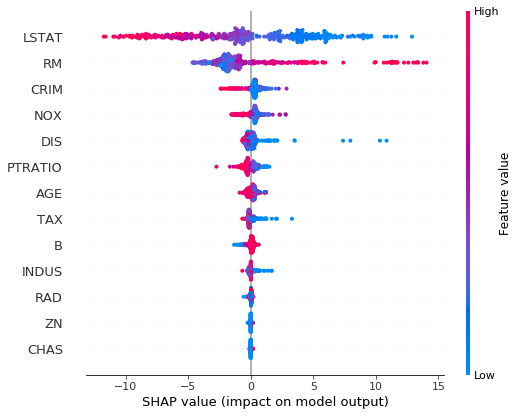

In [7]:
shap.summary_plot(shap_values, x_train)

In [8]:
shap.initjs()
shap.force_plot(base_value=explainer.expected_value, shap_values=shap_values, features=x_train)

In [9]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], x_train.iloc[0,:])